# Assigment 2

## GloVE

Nguyen Thai Anh - 122910

Constraint: Only use our code (not other code....)

1. I guess you already try a bigger corpus
2. I guess you already try window size 2
3. I guess you already have skipgram, skipgram(neg), cbow, glove

Do this:
1. Compare them based on syntactic accuracy and semantic accuracy, similar to how is done in https://nlp.stanford.edu/pubs/glove.pdf (see Table 2) - NO NEED to try 1000 or 300 embed size.....I just want you to learn how to do experiment.....
2. Try to find a correlation with just ONE similarity dataset (which humans judge how similar is two words.....)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. Define some very simple data for understanding

In [2]:
#specify the sentences / corpus
#corpus is defined as a set of documents
#document is basically a bunch of sentence(s)
corpus = [
    'he is a king',
    'he is a teacher',
    'she is a queen',
    'he is a man',
    'he is a professor',
    'she is a girl',
    'she is very beautiful',
    'I am very good',
    'I am a pressident',
    'he is a boy',
    'she is a woman',
    'Thailand has many temples',
    'yellow pagoda',
    'There are many temples in Thailand',
    'Vietnam has many pagodas',
    'Vietnam has many delicious dishes',
    'Data Science and AI Rise in the World',
    'Vietnam and Thailand are developing very fast in AI and Data Science',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
    'The capital of Vietnam is Hanoi',
    'The capital of Thailand is Bangkok',
    'NLP is too difficult',
    'ML is too easy',
    'CP is too difficult',
    'Learning to ride a motorbike is easy',
    'Learning to drive a car is easy',
    'Math is too difficult',
    'Linear is too easy',
    'DMM is too difficult',
    'I love you',
    'I hate you',
    'Spring is so warm',
    'winter is so cold',
    'I am so handsome'
    'Life is short. Don’t be lazy',
    'You are the biggest person when you have a kindness',
    'No one is old for fairytales',
    'Life is the greatest journey you will be ever on',
    'Some of the best thing in life are mistakes',
    'Everbody is reactionary on subjects they understand',
    'Life begins when you step out of your comfort zone',
    'Once you choose the hope, anything is possible',
    'Life is really simple, but we insist on making it complicated',
    'Love is starts with a smile, grows with a kiss and ends with a tear',
    'Life is not fair, get used to it',
    'Keep your face to the sunshine and you can not see a shadow',
    'Where there is love, there is life',
    'Be your dream, now or never ',
    'Stars can’t shine without darkness',
    'The healthy equals beautiful',
    'You may delay, but time will not',
    'You cannot heal the world until you heal yourself',
    'Because he will find an easy way to do it',
    'In life you have a choice: Bitter or Better? Choose better, foreget bitter',
    'Do not pray for an easy life, pray for the strength to endure a difficult one',
    'When somebody challenges you, fight back.Be brutal, be tough',
    'Change will not come if we wait for some other person or some other time. We are the ones we’ve been waiting for. We are the change that we seek',
    'Change is never easy, but always possible',
]

In [3]:
corpus = [sent.split(" ") for sent in corpus]
corpus

[['he', 'is', 'a', 'king'],
 ['he', 'is', 'a', 'teacher'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['he', 'is', 'a', 'professor'],
 ['she', 'is', 'a', 'girl'],
 ['she', 'is', 'very', 'beautiful'],
 ['I', 'am', 'very', 'good'],
 ['I', 'am', 'a', 'pressident'],
 ['he', 'is', 'a', 'boy'],
 ['she', 'is', 'a', 'woman'],
 ['Thailand', 'has', 'many', 'temples'],
 ['yellow', 'pagoda'],
 ['There', 'are', 'many', 'temples', 'in', 'Thailand'],
 ['Vietnam', 'has', 'many', 'pagodas'],
 ['Vietnam', 'has', 'many', 'delicious', 'dishes'],
 ['Data', 'Science', 'and', 'AI', 'Rise', 'in', 'the', 'World'],
 ['Vietnam',
  'and',
  'Thailand',
  'are',
  'developing',
  'very',
  'fast',
  'in',
  'AI',
  'and',
  'Data',
  'Science'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital'],
 ['The', 'capital', 'of', 'Vietnam', 'is', 'Hanoi'],
 ['The', 'capital', 'of', 'Thailand', 'is', 'Bangkok'],
 ['NLP', 'is', 'too', 'diffic

In [4]:
#get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['',
 'man',
 'comfort',
 'pressident',
 'dream,',
 'difficult',
 'I',
 'biggest',
 'they',
 'choose',
 'motorbike',
 'she',
 'Where',
 'journey',
 'grows',
 'Better?',
 'kindness',
 'teacher',
 'lazy',
 'challenges',
 'hope,',
 'ones',
 'woman',
 'when',
 'simple,',
 'In',
 'dishes',
 'healthy',
 'always',
 'The',
 'back.Be',
 'foreget',
 'out',
 'have',
 'Because',
 'but',
 'Be',
 'Keep',
 'Love',
 'handsomeLife',
 'girl',
 'delicious',
 'AI',
 'so',
 'anything',
 'yellow',
 'never',
 'fair,',
 'seek',
 'smile,',
 'Science',
 'can',
 'king',
 'developing',
 'see',
 'capital',
 'are',
 'life',
 'boy',
 'NLP',
 'short.',
 'love,',
 'delay,',
 'there',
 'winter',
 'hate',
 'yourself',
 'we',
 'not',
 'you',
 'of',
 'the',
 'an',
 'Data',
 'World',
 'that',
 'easy',
 'old',
 'ride',
 'warsaw',
 'Thailand',
 'really',
 'other',
 'ML',
 'one',
 'Change',
 'is',
 'When',
 'Math',
 'zone',
 'been',
 'equals',
 'better,',
 'subjects',
 'be',
 'good',
 'in',
 'You',
 'Some',
 'Learning',
 'am'

In [5]:
#numericalization
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'': 0, 'man': 1, 'comfort': 2, 'pressident': 3, 'dream,': 4, 'difficult': 5, 'I': 6, 'biggest': 7, 'they': 8, 'choose': 9, 'motorbike': 10, 'she': 11, 'Where': 12, 'journey': 13, 'grows': 14, 'Better?': 15, 'kindness': 16, 'teacher': 17, 'lazy': 18, 'challenges': 19, 'hope,': 20, 'ones': 21, 'woman': 22, 'when': 23, 'simple,': 24, 'In': 25, 'dishes': 26, 'healthy': 27, 'always': 28, 'The': 29, 'back.Be': 30, 'foreget': 31, 'out': 32, 'have': 33, 'Because': 34, 'but': 35, 'Be': 36, 'Keep': 37, 'Love': 38, 'handsomeLife': 39, 'girl': 40, 'delicious': 41, 'AI': 42, 'so': 43, 'anything': 44, 'yellow': 45, 'never': 46, 'fair,': 47, 'seek': 48, 'smile,': 49, 'Science': 50, 'can': 51, 'king': 52, 'developing': 53, 'see': 54, 'capital': 55, 'are': 56, 'life': 57, 'boy': 58, 'NLP': 59, 'short.': 60, 'love,': 61, 'delay,': 62, 'there': 63, 'winter': 64, 'hate': 65, 'yourself': 66, 'we': 67, 'not': 68, 'you': 69, 'of': 70, 'the': 71, 'an': 72, 'Data': 73, 'World': 74, 'that': 75, 'easy': 76, 'ol

In [6]:
#vocab size
voc_size = len(vocab)
print(voc_size)

211


In [7]:
#append UNK
vocab.append('<UNK>')

In [8]:
vocab

['',
 'man',
 'comfort',
 'pressident',
 'dream,',
 'difficult',
 'I',
 'biggest',
 'they',
 'choose',
 'motorbike',
 'she',
 'Where',
 'journey',
 'grows',
 'Better?',
 'kindness',
 'teacher',
 'lazy',
 'challenges',
 'hope,',
 'ones',
 'woman',
 'when',
 'simple,',
 'In',
 'dishes',
 'healthy',
 'always',
 'The',
 'back.Be',
 'foreget',
 'out',
 'have',
 'Because',
 'but',
 'Be',
 'Keep',
 'Love',
 'handsomeLife',
 'girl',
 'delicious',
 'AI',
 'so',
 'anything',
 'yellow',
 'never',
 'fair,',
 'seek',
 'smile,',
 'Science',
 'can',
 'king',
 'developing',
 'see',
 'capital',
 'are',
 'life',
 'boy',
 'NLP',
 'short.',
 'love,',
 'delay,',
 'there',
 'winter',
 'hate',
 'yourself',
 'we',
 'not',
 'you',
 'of',
 'the',
 'an',
 'Data',
 'World',
 'that',
 'easy',
 'old',
 'ride',
 'warsaw',
 'Thailand',
 'really',
 'other',
 'ML',
 'one',
 'Change',
 'is',
 'When',
 'Math',
 'zone',
 'been',
 'equals',
 'better,',
 'subjects',
 'be',
 'good',
 'in',
 'You',
 'Some',
 'Learning',
 'am'

In [9]:
word2index['<UNK>'] = 0

In [10]:
#just in case we need to use
index2word = {v:k for k, v in word2index.items()} 

## 2. Build Co-occurence Matrix X

Here, we need to count the co-occurence of two words given some window size.  We gonna use window size of 1.

In [11]:
from collections import Counter

X_i = Counter(flatten(corpus)) # X_i
X_i

Counter({'he': 6,
         'is': 35,
         'a': 18,
         'king': 1,
         'teacher': 1,
         'she': 4,
         'queen': 1,
         'man': 1,
         'professor': 1,
         'girl': 1,
         'very': 3,
         'beautiful': 2,
         'I': 5,
         'am': 3,
         'good': 1,
         'pressident': 1,
         'boy': 1,
         'woman': 1,
         'Thailand': 4,
         'has': 3,
         'many': 4,
         'temples': 2,
         'yellow': 1,
         'pagoda': 1,
         'There': 1,
         'are': 6,
         'in': 4,
         'Vietnam': 4,
         'pagodas': 1,
         'delicious': 1,
         'dishes': 1,
         'Data': 2,
         'Science': 2,
         'and': 5,
         'AI': 2,
         'Rise': 1,
         'the': 10,
         'World': 1,
         'developing': 1,
         'fast': 1,
         'warsaw': 1,
         'poland': 1,
         'capital': 5,
         'berlin': 1,
         'germany': 1,
         'paris': 1,
         'france': 1,
         

In [12]:
# Make skip gram of one size window
skip_grams = []
# loop each word sequence
# we starts from 1 because 0 has no context
# we stop at second last for the same reason
for sent in corpus:
    for i in range(1, len(sent) - 1):
        target = sent[i]
        context = [sent[i - 1], sent[i + 1]]
        for w in context:
            skip_grams.append((target, w))

skip_grams

[('is', 'he'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'king'),
 ('is', 'he'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'teacher'),
 ('is', 'she'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'queen'),
 ('is', 'he'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'man'),
 ('is', 'he'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'professor'),
 ('is', 'she'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'girl'),
 ('is', 'she'),
 ('is', 'very'),
 ('very', 'is'),
 ('very', 'beautiful'),
 ('am', 'I'),
 ('am', 'very'),
 ('very', 'am'),
 ('very', 'good'),
 ('am', 'I'),
 ('am', 'a'),
 ('a', 'am'),
 ('a', 'pressident'),
 ('is', 'he'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'boy'),
 ('is', 'she'),
 ('is', 'a'),
 ('a', 'is'),
 ('a', 'woman'),
 ('has', 'Thailand'),
 ('has', 'many'),
 ('many', 'has'),
 ('many', 'temples'),
 ('are', 'There'),
 ('are', 'many'),
 ('many', 'are'),
 ('many', 'temples'),
 ('temples', 'many'),
 ('temples', 'in'),
 ('in', 'temples'),
 ('in', 'Thailand'),
 ('has', 'Vietnam'),
 ('has', 'many'),
 ('many', 'has'),
 ('many', 'pago

In [13]:
X_ik_skipgram = Counter(skip_grams) # Co-occurece in window size 1
X_ik_skipgram

Counter({('is', 'he'): 5,
         ('is', 'a'): 8,
         ('a', 'is'): 8,
         ('a', 'king'): 1,
         ('a', 'teacher'): 1,
         ('is', 'she'): 4,
         ('a', 'queen'): 1,
         ('a', 'man'): 1,
         ('a', 'professor'): 1,
         ('a', 'girl'): 1,
         ('is', 'very'): 1,
         ('very', 'is'): 1,
         ('very', 'beautiful'): 1,
         ('am', 'I'): 3,
         ('am', 'very'): 1,
         ('very', 'am'): 1,
         ('very', 'good'): 1,
         ('am', 'a'): 1,
         ('a', 'am'): 1,
         ('a', 'pressident'): 1,
         ('a', 'boy'): 1,
         ('a', 'woman'): 1,
         ('has', 'Thailand'): 1,
         ('has', 'many'): 3,
         ('many', 'has'): 3,
         ('many', 'temples'): 2,
         ('are', 'There'): 1,
         ('are', 'many'): 1,
         ('many', 'are'): 1,
         ('temples', 'many'): 1,
         ('temples', 'in'): 1,
         ('in', 'temples'): 1,
         ('in', 'Thailand'): 1,
         ('has', 'Vietnam'): 2,
         ('many',

### Weighting function

GloVe includes a weighting function to scale down too frequent words.

<img src = "figures/glove_weighting_func.png" width=400>

In [14]:
#simply a normalized function...don't worry too much
def weighting(w_i, w_j, X_ik):
        
    #check whether the co-occurrences exist between these two words
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #if does not exist, set it to 1
                
    x_max = 100 #100 # fixed in paper  #cannot exceed 100 counts
    alpha = 0.75
    
    #if co-occurrence does not exceed 100, scale it based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max)**alpha  #scale it
    else:
        result = 1  #if is greater than max, set it to 1 maximum
    
    return result

In [15]:
from itertools import combinations_with_replacement

X_ik = {}  #for keeping the co-occurences
weighting_dic = {} #scaling the percentage of sampling

for bigram in combinations_with_replacement(vocab, 2):
    if X_ik_skipgram.get(bigram) is not None:  #matches 
        co_occer = X_ik_skipgram[bigram]  #get the count from what we already counted
        X_ik[bigram] = co_occer + 1 # + 1 for stability issue
        X_ik[(bigram[1],bigram[0])] = co_occer+1   #count also for the opposite
    else:
        pass
        
    weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

print(f"{X_ik=}")
print(f"{weighting_dic=}")


X_ik={('comfort', 'zone'): 2, ('zone', 'comfort'): 2, ('comfort', 'your'): 2, ('your', 'comfort'): 2, ('dream,', 'your'): 2, ('your', 'dream,'): 2, ('dream,', 'now'): 2, ('now', 'dream,'): 2, ('difficult', 'one'): 2, ('one', 'difficult'): 2, ('difficult', 'a'): 2, ('a', 'difficult'): 2, ('biggest', 'the'): 2, ('the', 'biggest'): 2, ('biggest', 'person'): 2, ('person', 'biggest'): 2, ('they', 'subjects'): 2, ('subjects', 'they'): 2, ('they', 'understand'): 2, ('understand', 'they'): 2, ('choose', 'you'): 2, ('you', 'choose'): 2, ('choose', 'the'): 2, ('the', 'choose'): 2, ('motorbike', 'is'): 2, ('is', 'motorbike'): 2, ('motorbike', 'a'): 2, ('a', 'motorbike'): 2, ('journey', 'you'): 2, ('you', 'journey'): 2, ('journey', 'greatest'): 2, ('greatest', 'journey'): 2, ('grows', 'smile,'): 2, ('smile,', 'grows'): 2, ('grows', 'with'): 2, ('with', 'grows'): 2, ('Better?', 'or'): 2, ('or', 'Better?'): 2, ('Better?', 'Choose'): 2, ('Choose', 'Better?'): 2, ('challenges', 'somebody'): 2, ('someb

## 3. Prepare train data

In [16]:
for c in corpus:
    print(c)

['he', 'is', 'a', 'king']
['he', 'is', 'a', 'teacher']
['she', 'is', 'a', 'queen']
['he', 'is', 'a', 'man']
['he', 'is', 'a', 'professor']
['she', 'is', 'a', 'girl']
['she', 'is', 'very', 'beautiful']
['I', 'am', 'very', 'good']
['I', 'am', 'a', 'pressident']
['he', 'is', 'a', 'boy']
['she', 'is', 'a', 'woman']
['Thailand', 'has', 'many', 'temples']
['yellow', 'pagoda']
['There', 'are', 'many', 'temples', 'in', 'Thailand']
['Vietnam', 'has', 'many', 'pagodas']
['Vietnam', 'has', 'many', 'delicious', 'dishes']
['Data', 'Science', 'and', 'AI', 'Rise', 'in', 'the', 'World']
['Vietnam', 'and', 'Thailand', 'are', 'developing', 'very', 'fast', 'in', 'AI', 'and', 'Data', 'Science']
['warsaw', 'is', 'poland', 'capital']
['berlin', 'is', 'germany', 'capital']
['paris', 'is', 'france', 'capital']
['The', 'capital', 'of', 'Vietnam', 'is', 'Hanoi']
['The', 'capital', 'of', 'Thailand', 'is', 'Bangkok']
['NLP', 'is', 'too', 'difficult']
['ML', 'is', 'too', 'easy']
['CP', 'is', 'too', 'difficult']
['

In [17]:
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    #convert to id since our skip_grams is word, not yet id
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    random_inputs = []
    random_labels = []
    random_coocs  = []
    random_weightings = []
    random_index = np.random.choice(range(len(skip_grams_id)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams_id[i][1]])  # context word, e.g., 3
        
        #get cooc
        pair = skip_grams[i]
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1
        random_coocs.append([math.log(cooc)])
        
        #get weighting
        weighting = weighting_dic[pair]
        random_weightings.append([weighting])
                    
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weightings)

### Testing the method

In [18]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic)

print("Input: ", input_batch)
print("Target: ", target_batch)
print("Cooc: ", cooc_batch)
print("Weighting: ", weighting_batch)

#we will convert them to tensor during training, so don't worry...

Input:  [[194]
 [181]]
Target:  [[30]
 [ 5]]
Cooc:  [[0.69314718]
 [0.69314718]]
Weighting:  [[0.05318296]
 [0.05318296]]


## 4. Model


In [19]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

## 5. Training

In [20]:
batch_size     = 10 # mini-batch size
embedding_size = 2 #so we can later plot
model          = GloVe(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [22]:
import time

# Training
num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic)
    input_batch  = torch.LongTensor(input_batch)         #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch)        #[batch_size, 1]
    cooc_batch   = torch.FloatTensor(cooc_batch)         #[batch_size, 1]
    weighting_batch = torch.FloatTensor(weighting_batch) #[batch_size, 1]
    
    optimizer.zero_grad()
    loss = model(input_batch, target_batch, cooc_batch, weighting_batch)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1} | Loss : {loss:.6f} | Time : {epoch_mins}m {epoch_secs}s')


Epoch : 1000 | Loss : 1.445680 | Time : 0m 3s
Epoch : 2000 | Loss : 0.500134 | Time : 0m 5s
Epoch : 3000 | Loss : 1.718351 | Time : 0m 7s
Epoch : 4000 | Loss : 2.421982 | Time : 0m 9s
Epoch : 5000 | Loss : 0.341087 | Time : 0m 11s


## 5. Plotting the embeddings

In [23]:
#list of vocabs
vocab[:10]

['',
 'man',
 'comfort',
 'pressident',
 'dream,',
 'difficult',
 'I',
 'biggest',
 'they',
 'choose']

In [24]:
word = vocab[0]

In [25]:
#numericalization
id = word2index[word]
id

0

In [26]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [27]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[-0.2441,  0.7386]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.0606, -0.3447]], grad_fn=<EmbeddingBackward0>))

In [28]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(0.1970, grad_fn=<SelectBackward0>)

In [29]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

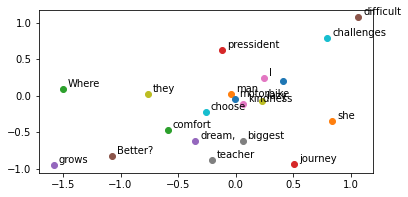

In [30]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 6. Cosine similarity

Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

If $p$ and $q$ is super similar, the result is 1 otherwise 0.

In [31]:
vocab

['',
 'man',
 'comfort',
 'pressident',
 'dream,',
 'difficult',
 'I',
 'biggest',
 'they',
 'choose',
 'motorbike',
 'she',
 'Where',
 'journey',
 'grows',
 'Better?',
 'kindness',
 'teacher',
 'lazy',
 'challenges',
 'hope,',
 'ones',
 'woman',
 'when',
 'simple,',
 'In',
 'dishes',
 'healthy',
 'always',
 'The',
 'back.Be',
 'foreget',
 'out',
 'have',
 'Because',
 'but',
 'Be',
 'Keep',
 'Love',
 'handsomeLife',
 'girl',
 'delicious',
 'AI',
 'so',
 'anything',
 'yellow',
 'never',
 'fair,',
 'seek',
 'smile,',
 'Science',
 'can',
 'king',
 'developing',
 'see',
 'capital',
 'are',
 'life',
 'boy',
 'NLP',
 'short.',
 'love,',
 'delay,',
 'there',
 'winter',
 'hate',
 'yourself',
 'we',
 'not',
 'you',
 'of',
 'the',
 'an',
 'Data',
 'World',
 'that',
 'easy',
 'old',
 'ride',
 'warsaw',
 'Thailand',
 'really',
 'other',
 'ML',
 'one',
 'Change',
 'is',
 'When',
 'Math',
 'zone',
 'been',
 'equals',
 'better,',
 'subjects',
 'be',
 'good',
 'in',
 'You',
 'Some',
 'Learning',
 'am'

In [32]:
#let's try similarity between first and second, and second and third
come          = get_embed('come')
time        = get_embed('time')
germany       = get_embed('germany')

In [33]:
#numpy version
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
print(f"come vs. time: ",        cos_sim(come, time))
print(f"come vs. germany",     cos_sim(come, germany))
print(f"come  vs come",       cos_sim(come, come))

come vs. time:  0.6383663964241713
come vs. germany -0.9523070528991262
come  vs come 1.0000000000000002


In [34]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"come vs. time: ",        cos_sim(come, time))
print(f"come vs. germany",     cos_sim(come, germany))
print(f"come vs come ",       cos_sim(come, come))

come vs. time:  0.6383663964241711
come vs. germany -0.9523070528991262
come vs come  1
